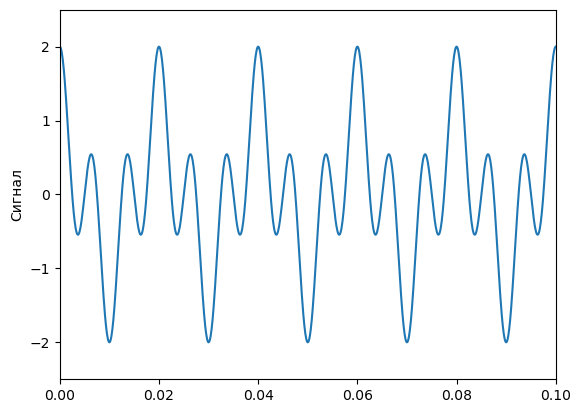

In [2]:
from math import pi, cos
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

freq_fst = 50
freq_snd = 150
def w(frequency):
    return 2 * pi * frequency

def x(t):
    return cos(w(freq_fst) * t) + cos(w(freq_snd) * t)

def dft_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

x_val = 0
x_values = []
y_values = []
steps = 10000
for i in range(steps):
    x_values.append(x_val)
    y_values.append(x(x_val))
    x_val += 1 / steps

plt.plot(x_values, y_values)
plt.axis((0, 0.1, -2.5, 2.5))
plt.ylabel("Сигнал")
plt.show()


In [14]:
%timeit dft_slow(y_values)
%timeit np.fft.fft(y_values)

2.66 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
445 μs ± 5.34 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


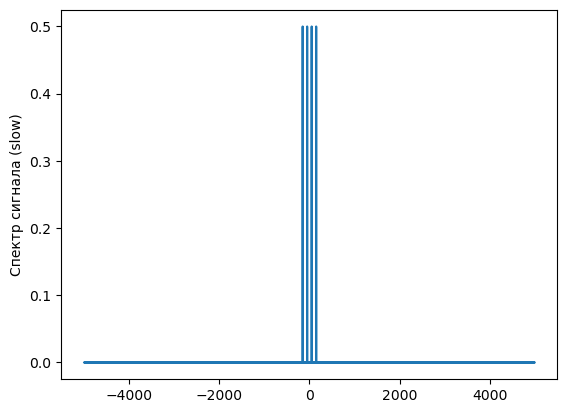

/usr/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


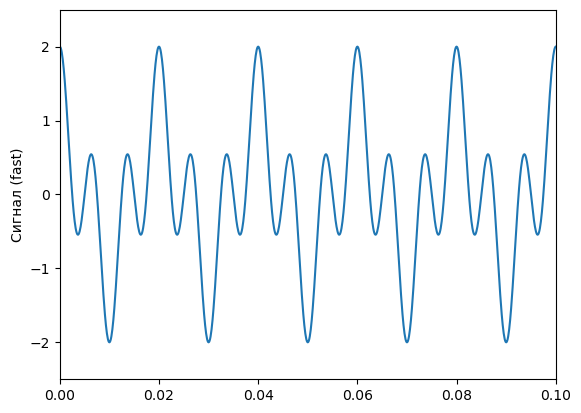

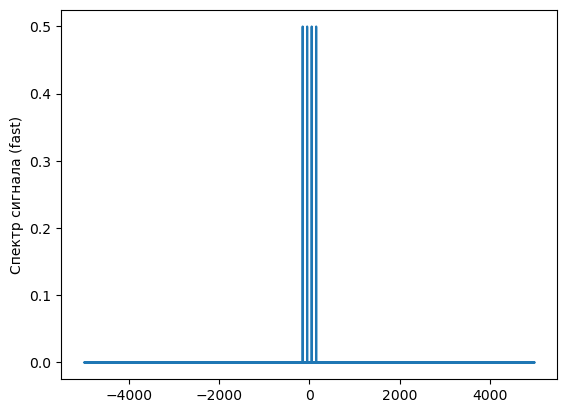

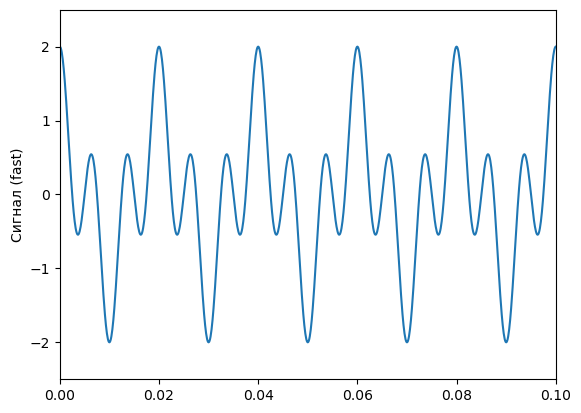

In [4]:
np.fft.ifft(dft_slow(x_values))
np.fft.ifft(np.fft.fft(x_values))
freq_values = np.fft.fftfreq(steps, 1 / steps)

density_values_slow = abs(dft_slow(y_values)) / steps
density_values_fast = abs(np.fft.fft(y_values)) / steps

signal_slow = np.fft.ifft(dft_slow(y_values))
signal_fast = np.fft.ifft(np.fft.fft(y_values))

plt.plot(freq_values, density_values_slow)
plt.ylabel("Спектр сигнала (slow)")
plt.show()

plt.plot(x_values, signal_slow)
plt.ylabel("Cигнал (fast)")
plt.axis((0, 0.1, -2.5, 2.5))
plt.show()

plt.plot(freq_values, density_values_fast)
plt.ylabel("Спектр сигнала (fast)")
plt.show()

plt.plot(x_values, signal_fast)
plt.ylabel("Cигнал (fast)")
plt.axis((0, 0.1, -2.5, 2.5))
plt.show()

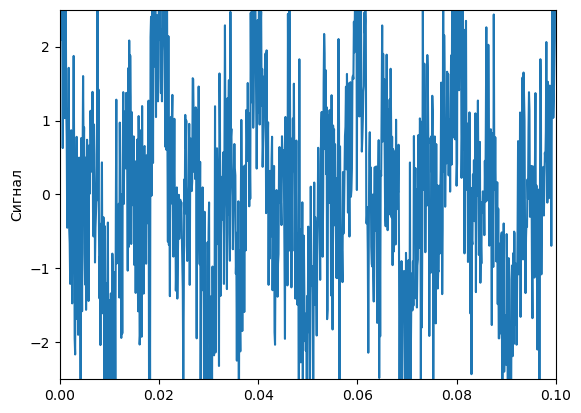

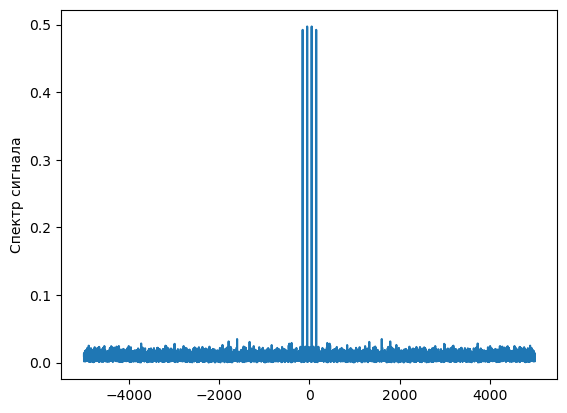

In [5]:
y_values_noisy = y_values + np.random.normal(0, 1, len(x_values))
density_values_noisy = abs(np.fft.fft(y_values_noisy)) / steps

plt.plot(x_values, y_values_noisy)
plt.axis((0, 0.1, -2.5, 2.5))
plt.ylabel("Сигнал")
plt.show()

plt.plot(freq_values, density_values_noisy)
plt.ylabel("Спектр сигнала")
plt.show()

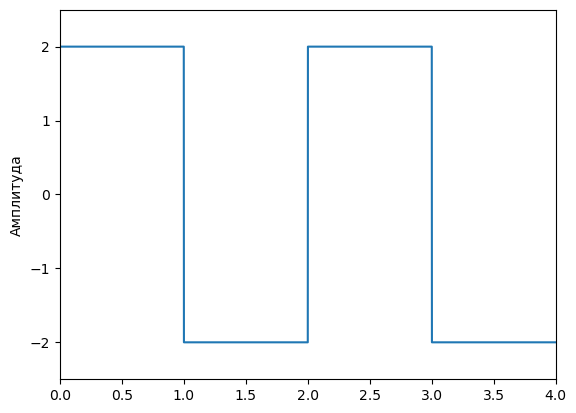

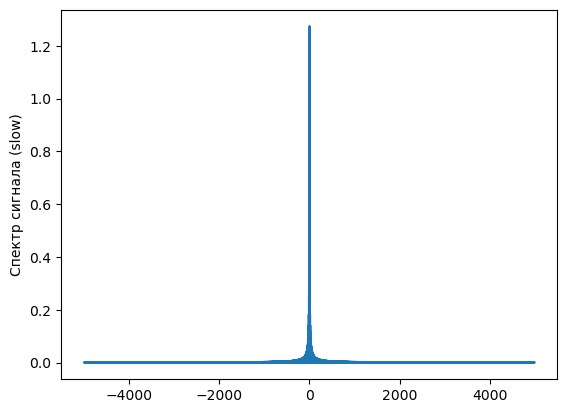

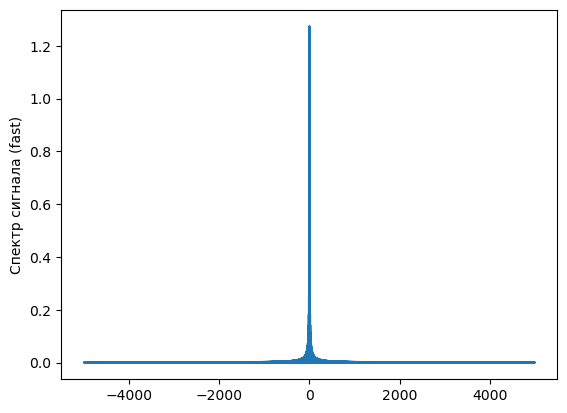

In [16]:
from math import floor


def x(t):
    return 2 if floor(t) % 2 == 0 else -2

x_val = 0
x_values = []
y_values = []
steps = 10000
for i in range(0, steps):
    x_values.append(x_val)
    y_values.append(x(x_val))
    x_val += 4 / steps
    
plt.plot(x_values, y_values)
plt.axis((0, 4, -2.5, 2.5))
plt.ylabel("Амплитуда")
plt.show()

freq_values = np.fft.fftfreq(steps, 1 / steps)

density_values_slow = abs(dft_slow(y_values)) / steps
density_values_fast = abs(np.fft.fft(y_values)) / steps

plt.plot(freq_values, density_values_slow)
plt.ylabel("Спектр сигнала (slow)")
plt.show()

plt.plot(freq_values, density_values_fast)
plt.ylabel("Спектр сигнала (fast)")
plt.show()



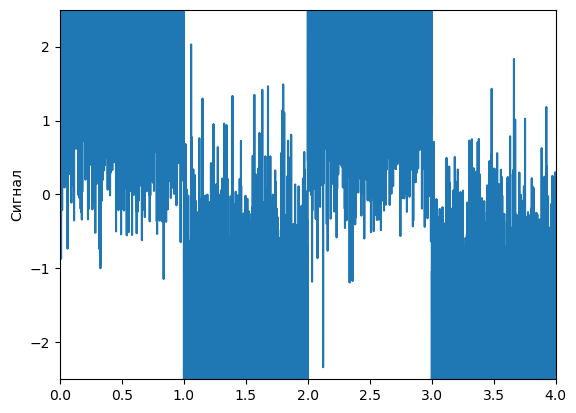

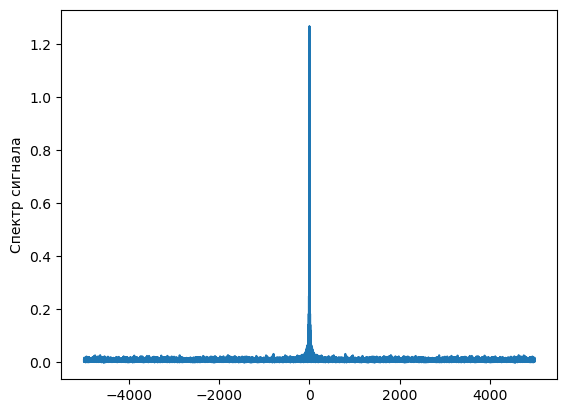

In [17]:
y_values_noisy = y_values + np.random.normal(0, 1, len(x_values))
density_values_noisy = abs(np.fft.fft(y_values_noisy)) / steps

plt.plot(x_values, y_values_noisy)
plt.axis((0, 4, -2.5, 2.5))
plt.ylabel("Сигнал")
plt.show()

plt.plot(freq_values, density_values_noisy)
plt.ylabel("Спектр сигнала")
plt.show()

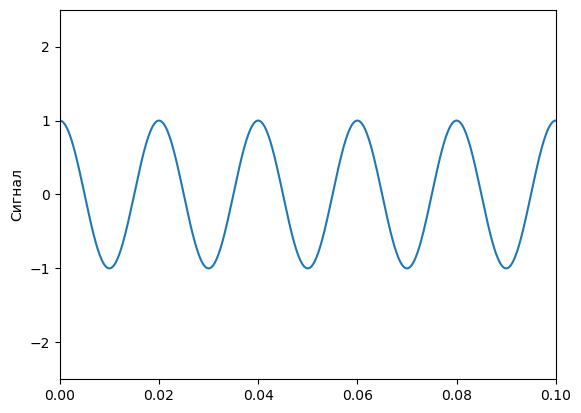

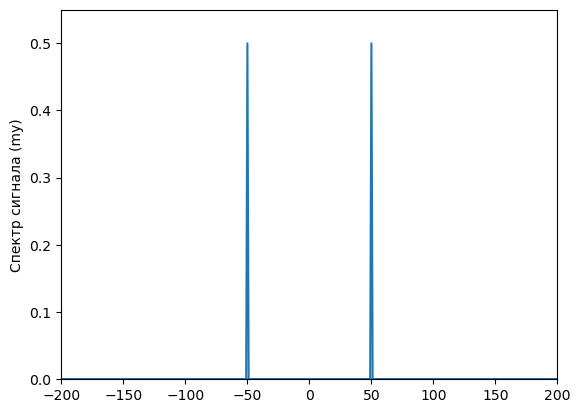

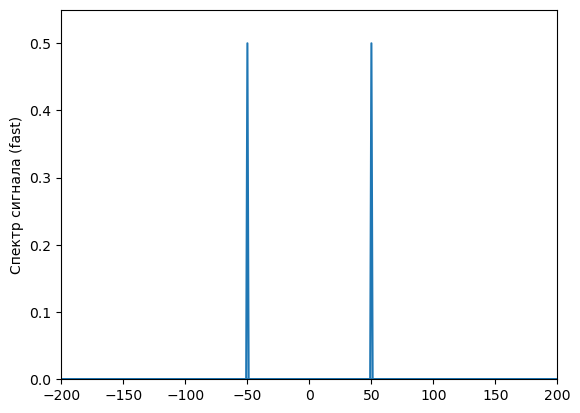

In [31]:
def fft(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()
    
def x(t):
    return cos(w(50) * t)

x_val = 0
x_values = []
y_values = []
steps = 8192
for i in range(steps):
    x_values.append(x_val)
    y_values.append(x(x_val))
    x_val += 1 / steps


plt.plot(x_values, y_values)
plt.axis((0, 0.1, -2.5, 2.5))
plt.ylabel("Сигнал")
plt.show()

freq_values = np.fft.fftfreq(steps, 1 / steps)

density_values_my = abs(fft(y_values)) / steps
density_values_fast = abs(np.fft.fft(y_values)) / steps

plt.plot(freq_values, density_values_my)
plt.ylabel("Спектр сигнала (my)")
plt.axis((-200, 200, 0, 0.55))
plt.show()

plt.plot(freq_values, density_values_fast)
plt.ylabel("Спектр сигнала (fast)")
plt.axis((-200, 200, 0, 0.55))
plt.show()

In [28]:
%timeit fft(y_values)
%timeit np.fft.fft(y_values)

1.04 ms ± 7.05 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
347 μs ± 1.95 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
